In [1]:
import numpy as np
import pickle
import matplotlib.pylab as plt
import nglview
import ase, ase.io
import aml

# Part 1: AIMD

In [2]:
# Visualise the AIMD trajectory run
aimd = ase.io.read('01-AIMD-ice/ICE-Ih-pos-1.xyz',':')
nglview.show_asetraj(aimd)

NGLWidget(max_frame=5)

In [3]:
# Compute time per step:
energy_aimd1 = np.loadtxt('01-AIMD-ice/ICE-Ih-1.ener')

np.average(energy_aimd1[:,6])

22.702408939714285

In [4]:
# Visualise the AIMD trajectory run on HPC resource
aimd2 = ase.io.read('._RESULTS_/01-AIMD-ice/ICE-Ih-pos-1.xyz',':')
nglview.show_asetraj(aimd2)

NGLWidget(max_frame=1000)

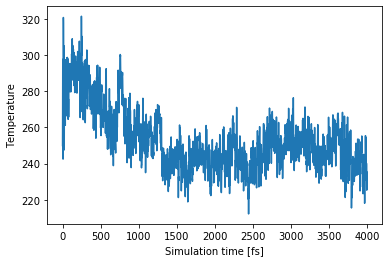

In [5]:
# Analyse Temperature and potential energy
energy_aimd2 = np.loadtxt('._RESULTS_/01-AIMD-ice/ICE-Ih-1.ener')

plt.plot(energy_aimd2[:,1], energy_aimd2[:,3])

plt.ylabel('Temperature')
plt.xlabel('Simulation time [fs]')
plt.show()

# Part 2: Training of the C-NNP

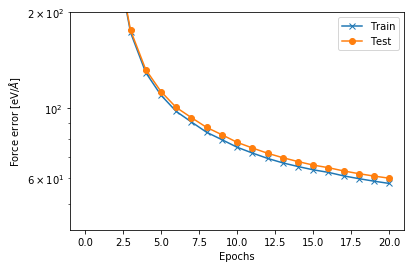

In [6]:
# Analyse learning curve of NNP optimization

nnp1_learning = np.loadtxt('02-MLP-train/final-training/train-000/learning-curve.out')

au2eVA = 1000/aml.constants.eV*aml.constants.angstrom
plt.plot(nnp1_learning[:,0],nnp1_learning[:,9]*au2eVA, '-x', label='Train')
plt.plot(nnp1_learning[:,0],nnp1_learning[:,10]*au2eVA,'-o', label='Test')

plt.legend()
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel(r'Force error [eV/$\AA$]')
plt.ylim(ymax=200)
plt.show()

# Part 3: Simulation with the C-NNP

In [7]:
# Visualise the C-NNP trajectory
cnnp = ase.io.read('03-MLP-ice/ICE-Ih-pos-1.xyz','::10')
nglview.show_asetraj(cnnp)

NGLWidget(max_frame=500)

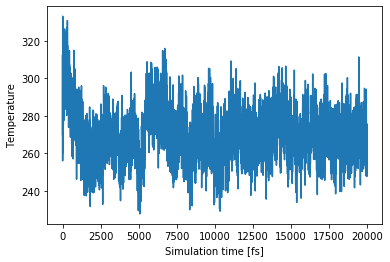

In [8]:
# Analyse Temperature and potential energy
energy_cnnp = np.loadtxt('03-MLP-ice/ICE-Ih-1.ener')

plt.plot(energy_cnnp[:,1], energy_cnnp[:,3])

plt.ylabel('Temperature')
plt.xlabel('Simulation time [fs]')
plt.show()

# Part 4: Validation

In [9]:
rdf = pickle.load(open('04-validation/rdf-res.pkl','rb'))
vdos = pickle.load(open('04-validation/vdos-res.pkl','rb'))
forces = pickle.load(open('04-validation/force-res.pkl','rb'))

# Force prediction

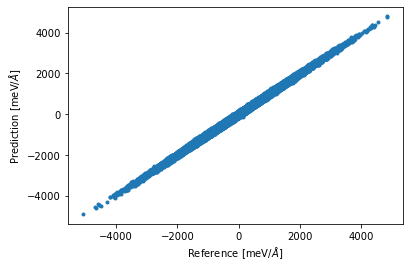

In [10]:
# Force:
plt.plot(forces['ref_force']['O'].flatten(),forces['test_force']['O'].flatten(),'.')

plt.xlabel('Reference [meV/$\AA{}$]')
plt.ylabel('Prediction [meV/$\AA{}$]')

plt.show()

In [11]:
# TODO plot the other force correlation and compute both force RMSEs




## Structure:

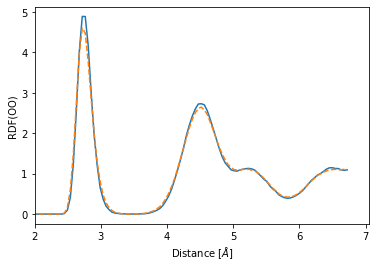

In [12]:
# RDFs:
plt.plot(rdf['ref_rdf']['O-O'][0]*10,rdf['ref_rdf']['O-O'][1])
plt.plot(rdf['test_rdf']['O-O'][0]*10,rdf['test_rdf']['O-O'][1],'--')

plt.xlim(xmin=2)
plt.xlabel('Distance [$\AA$]')
plt.ylabel('RDF(OO)')

plt.show()

In [13]:
# TODO: Extend this for the other RDFs



## Dynamics

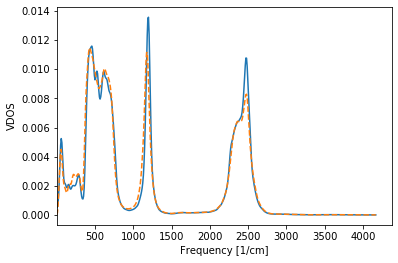

In [14]:
# RDFs:
plt.plot(vdos['ref_vdos']['H'][0],vdos['ref_vdos']['H'][1])
plt.plot(vdos['test_vdos']['H'][0],vdos['test_vdos']['H'][1],'--')

plt.xlim(xmin=2)
plt.xlabel('Frequency [1/cm]')
plt.ylabel('VDOS')

plt.show()

In [15]:
# TODO: Extend this for the other VDOS

